### Regressão linear na prática

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
wines = pd.read_excel("data\winequality-white.xlsx")
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


- Dados precisam apresentar uma relação linear entre eles para que possamos realizar a regressão

<Axes: >

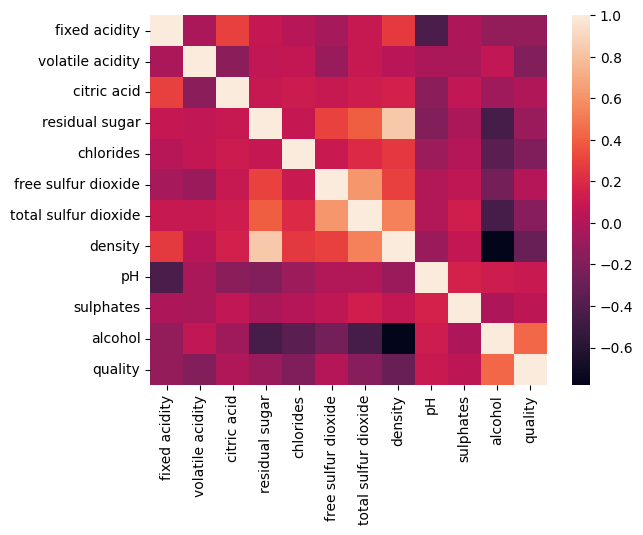

In [6]:
sns.heatmap(wines.corr())

In [8]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [22]:
X_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
y_columns = ['quality'] 

In [23]:
X = wines[X_columns]
y = wines[y_columns]

In [24]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [21]:
y.head()

,quality
0,6
1,6
2,6
3,6
4,6


Dividindo conjunto de dados: conjunto de treino e de teste

In [17]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # 30% para teste e 70% para treino

In [26]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3993,6.7,0.28,0.34,8.9,0.048,32.0,111.0,0.99455,3.25,0.54,11.0
4406,6.3,0.29,0.29,3.3,0.037,32.0,140.0,0.98950,3.17,0.36,12.8
1905,7.5,0.29,0.67,8.1,0.037,53.0,166.0,0.99660,2.90,0.41,8.9
2622,6.6,0.26,0.21,2.9,0.026,48.0,126.0,0.99089,3.22,0.38,11.3
3041,6.2,0.33,0.41,16.8,0.037,58.0,173.0,0.99882,3.25,0.57,9.4


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
lr.coef_ # Coeficientes angulares

array([[ 9.46658323e-02, -1.82543795e+00,  3.07827695e-03,
         1.04348518e-01, -2.77044766e-01,  4.17726945e-03,
         8.34206575e-05, -2.23683929e+02,  7.91866647e-01,
         7.40460470e-01,  1.05663168e-01]])

In [32]:
preds = lr.predict(X_test)
preds

array([[5.95318578],
       [6.15820669],
       [5.89609505],
       ...,
       [5.39849296],
       [5.64762769],
       [5.52980317]])

Visualização

Text(0, 0.5, 'Valores preditos')

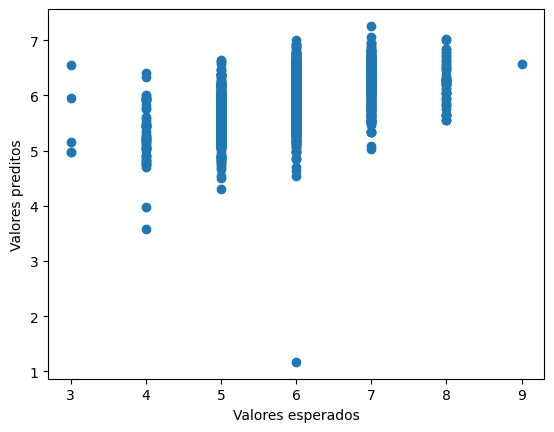

In [34]:
plt.scatter(y_test, preds)
plt.xlabel("Valores esperados")
plt.ylabel("Valores preditos")

O ideal para um modelo perfeito seria uma linha completamente reta.

In [35]:
from sklearn.metrics import mean_squared_error

In [37]:
print("Valor numérico do erro:",mean_squared_error(y_test, preds))

Valor numérico do erro: 0.586603219011801


Calcula diferença dos pontos preditos e reais e calcula seu quadrado. Soma tudo e divide pelo número de pontos. Assim, quanto menor esse valor, mais próximo a predição está.